## Aufgabe zum Gradientenverfahren

#### Imports & Settings

In [1549]:
# in this code block we gather all imports

# we import pandas only since it is needed by ppscore

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ppscore as pps
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


#### Load Data

In [1550]:
# in this code block we load the data

# this is the number of data points aka. instances in the given dataset
number_of_known_data_points = 14

x_known_unsorted = np.asarray([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290]).astype('float32')
assert x_known_unsorted.shape == (number_of_known_data_points,)
assert x_known_unsorted.dtype == 'float32'

y_known_unsorted = np.asarray([44,97,30,51,95,51,44,41,21,40,90,83,61,92]).astype('float32')
assert y_known_unsorted.shape == (number_of_known_data_points,)
assert y_known_unsorted.dtype == 'float32'

dataset_known = np.asarray([ x_known_unsorted, y_known_unsorted ]).transpose()
dataset_known.sort(axis=0)
assert dataset_known.shape == (number_of_known_data_points,2)
assert dataset_known.dtype == 'float32'
print(dataset_known.shape)
print(f"dataset_known=\n{dataset_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
x_known = dataset_known[:,0]
assert x_known.shape == (number_of_known_data_points,)
assert x_known.dtype == 'float32'
print(f"x_known=\n{x_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
y_known = dataset_known[:,1]
assert y_known.shape == (number_of_known_data_points,)
assert y_known.dtype == 'float32'
print(f"y_known=\n{y_known}")


(14, 2)
dataset_known=
[[  84.   21.]
 [ 282.   30.]
 [ 396.   40.]
 [ 474.   41.]
 [ 501.   44.]
 [ 660.   44.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   61.]
 [1110.   83.]
 [1260.   90.]
 [1290.   92.]
 [1323.   95.]
 [1386.   97.]]
x_known=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_known=
[21. 30. 40. 41. 44. 44. 51. 51. 61. 83. 90. 92. 95. 97.]


### Exploratory Data Analysis

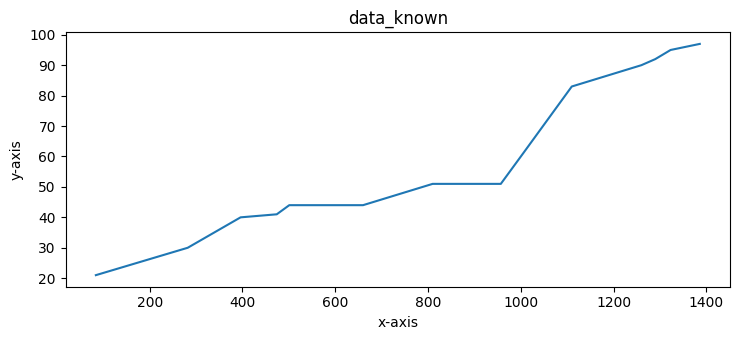

mean=[824.1429  60.    ]
trimmed_mean=[839.        60.166668]
mode=ModeResult(mode=array([[84., 44.]], dtype=float32), count=array([[1, 2]]))
range=[1302.   76.]
iqr=[741.75  46.5 ]
percentile_10=[316.2  33. ]
percentile_25=[480.75  41.75]
median=[883.5  51. ]
percentile_75=[1222.5    88.25]
percentile_90=[1313.1   94.1]
mad=[366.        22.571428]
std=[412.55402  25.21904]
var=[170200.83    636.  ]

correlation_matrix=
[[1.   0.96]
 [0.96 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.767058,regression,True,mean absolute error,21.285715,4.958333,DecisionTreeRegressor()
2,y,x,0.686732,regression,True,mean absolute error,366.000000,114.656250,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [1551]:
# in this code block we do an EDA

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known,y_known)
plt.title('data_known')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known)}")
print(f"iqr={stats.iqr(dataset_known, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known)}")

print(f"std={dataset_known.std(axis=0)}")
print(f"var={dataset_known.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known, rowvar=False).round(decimals=2)}")

dataset_known_pd = pd.DataFrame(dataset_known, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)




### Normalize Data

In [1552]:
# in this code block we normalize the data

scaler = MinMaxScaler()
scaler.fit(dataset_known)

# note that we do not need to sort again after scaler.transform(...)
# nor do we need to switch back to data type float32
# since the function preserves order and data type

dataset_known_norm = scaler.transform(dataset_known)
assert dataset_known_norm.shape == (number_of_known_data_points,2)
assert dataset_known_norm.dtype == 'float32'
print(dataset_known_norm.shape)
print(f"dataset_known_norm=\n{dataset_known}")

x_known_norm = dataset_known_norm[:,0]
assert x_known_norm.shape == (number_of_known_data_points,)
assert x_known_norm.dtype == 'float32'
print(f"x_known_norm=\n{x_known_norm}")

y_known_norm = dataset_known_norm[:,1]
assert y_known_norm.shape == (number_of_known_data_points,)
assert y_known_norm.dtype == 'float32'
print(f"y_known_norm=\n{y_known_norm}")


(14, 2)
dataset_known_norm=
[[  84.   21.]
 [ 282.   30.]
 [ 396.   40.]
 [ 474.   41.]
 [ 501.   44.]
 [ 660.   44.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   61.]
 [1110.   83.]
 [1260.   90.]
 [1290.   92.]
 [1323.   95.]
 [1386.   97.]]
x_known_norm=
[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.70737326 0.7880184  0.9032258  0.92626727
 0.9516129  1.        ]
y_known_norm=
[0.         0.11842108 0.25000003 0.26315793 0.3026316  0.3026316
 0.39473686 0.39473686 0.5263158  0.81578946 0.90789473 0.93421054
 0.9736842  1.        ]


### Exploratory Data Analysis on normalized data

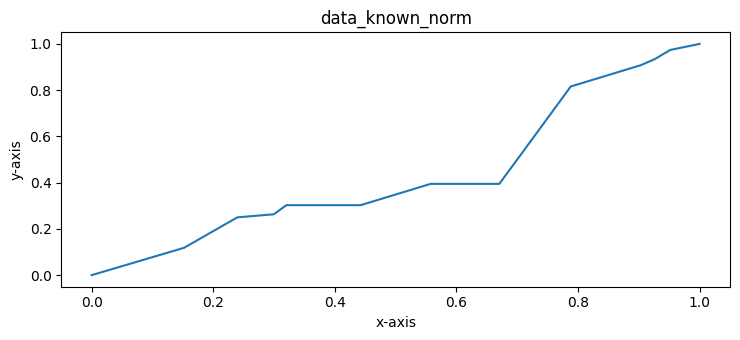

mean=[0.56846607 0.5131579 ]
trimmed_mean=[0.5798771 0.5153509]
mode=ModeResult(mode=array([[0.       , 0.3026316]], dtype=float32), count=array([[1, 2]]))
range=[1. 1.]
iqr=[0.56970043 0.61184207]
percentile_10=[0.17834102 0.15789476]
percentile_25=[0.30472351 0.27302635]
median=[0.61405531 0.39473686]
percentile_75=[0.87442394 0.88486841]
percentile_90=[0.9440092 0.9618421]
mad=[0.28110597 0.29699248]
std=[0.31686178 0.33182946]
var=[0.10040139 0.1101108 ]

correlation_matrix=
[[1.   0.96]
 [0.96 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.767058,regression,True,mean absolute error,0.280075,0.065241,DecisionTreeRegressor()
2,y,x,0.686732,regression,True,mean absolute error,0.281106,0.088062,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [1553]:
# in this code block we run the EDA again this time on the normalized data

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known_norm,y_known_norm)
plt.title('data_known_norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known_norm.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known_norm.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known_norm, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known_norm)}")
print(f"iqr={stats.iqr(dataset_known_norm, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known_norm, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known_norm, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known_norm, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known_norm, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known_norm, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known_norm)}")

print(f"std={dataset_known_norm.std(axis=0)}")
print(f"var={dataset_known_norm.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known_norm, rowvar=False).round(decimals=2)}")

dataset_known_norm_pd = pd.DataFrame(dataset_known_norm, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_norm_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)


### Model Function

In [1554]:
# in this code block we define our model function

# design aspects
# only one feature
# purely linear without any non-linear terms
# degree of the polynomial is 1
# thus also only one weight per feature
# b as an additive weight representing bias

# first in pure python for single x values
# note that the expressions behind the colons and behind the -> are just type hints
# in this case all hinting at float
# they might be disregarded as python in general does not check the types of values on function call
def f_pure_python(w : float, x: float, b: float) -> float:
    y = w * x + b
    return y

# now with numpy for any numpy array of any number of x values

# w stands for the weight or weights
# x stands for one or more x values
# b stands for the bias

def f(w, x, b):
    # note that these fancy pre-condition checks are out-commented
    # so as to also support cases in which w or b or x is provided as a plain vanilla python float
    # pre-condition checks
    #assert w.shape == (), "w must be a numpy scalar"
    #assert np.isscalar(w), "w must be a numpy scalar"
    #assert w.dtype == 'float32', "w must be of dtype float32"
    #assert b.shape == (), "b must be a numpy scalar"
    #assert np.isscalar(b), "b must be a numpy scalar"
    #assert b.dtype == 'float32', "b must be of dtype float32"
    #assert x.dtype == 'float32', "xs must be of dtype float32"
    y = w * x + b
    # note that these fancy post-condition checks are out-commented
    # so as to also support cases in which w or b or x are provided as a plain vanilla floats
    # interestingly this basically makes the function definition the same as in the pure form above
    # post-condition checks
    #assert y.dtype == 'float32', "y must be of dtype float32"
    #assert y.shape == x.shape, "y must be of same shape as xs"
    return y


y_modelled_example_pure_python=1.25
y_modelled_example_1=1.25
y_known=
[21. 30. 40. 41. 44. 44. 51. 51. 61. 83. 90. 92. 95. 97.]
y_modelled_example_2=
[21. 33. 39. 44. 45. 54. 63. 72. 74. 81. 89. 91. 93. 97.]
y_modelled_example=
[21. 33. 39. 44. 45. 54. 63. 72. 74. 81. 89. 91. 93. 97.]


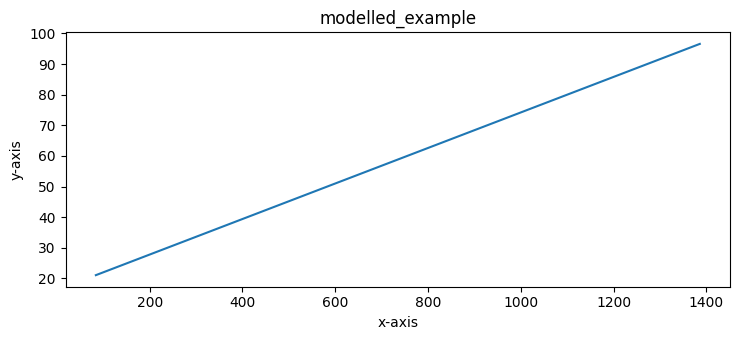

In [1555]:
# in this code block we just try out the model function

# with some arbitrary values
# with the normalized data

# try out the pure version
y_modelled_example_pure_python = f_pure_python(.75,1.,.5)
assert y_modelled_example_pure_python == 1.25
print(f"y_modelled_example_pure_python={y_modelled_example_pure_python}")

# try out the numpy version with just one arbitrary x value
y_modelled_example_1 = f(.75, 1., .5,)
assert y_modelled_example_1 == np.float32(1.25)
assert np.isscalar(y_modelled_example_1)
print(f"y_modelled_example_1={y_modelled_example_1}")
print(f"y_known=\n{y_known}")

# these are our more carefully chosen examples for w and b
# as plain python floats
w_example = .058
b_example = 16.2
# as numpy objects
w_example_np = np.asarray([w_example], dtype='float32')
b_example_np = np.asarray([b_example], dtype='float32')

# try out the numpy version with our known x values
y_modelled_example_2 = f(w_example, x_known, b_example)
assert y_modelled_example_2.shape == y_known.shape
assert y_modelled_example_2.dtype == 'float32'
assert np.isscalar(y_modelled_example_2) == False
print(f"y_modelled_example_2=\n{np.round(y_modelled_example_2, 0)}")

# check if it also works if we provide the one weight and the bias as numpy arrays
assert x_known.dtype == 'float32'

y_modelled_example = f(w_example_np, x_known, b_example_np)
assert y_modelled_example.shape == y_known.shape
assert y_modelled_example.dtype == 'float32'
assert np.isscalar(y_modelled_example) == False
print(f"y_modelled_example=\n{np.round(y_modelled_example, 0)}")

# plain line plot of the modelled example
plt.figure(dpi=100)
plt.plot(x_known,y_modelled_example)
plt.title('modelled_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

x_known_norm=
[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.70737326 0.7880184  0.9032258  0.92626727
 0.9516129  1.        ]
y_known_norm=
[0.         0.11842108 0.25000003 0.26315793 0.3026316  0.3026316
 0.39473686 0.39473686 0.5263158  0.81578946 0.90789473 0.93421054
 0.9736842  1.        ]
y_modelled_example_2=
[0.    0.152 0.24  0.3   0.32  0.442 0.558 0.671 0.707 0.788 0.903 0.926
 0.952 1.   ]
y_modelled_example=
[0.    0.152 0.24  0.3   0.32  0.442 0.558 0.671 0.707 0.788 0.903 0.926
 0.952 1.   ]


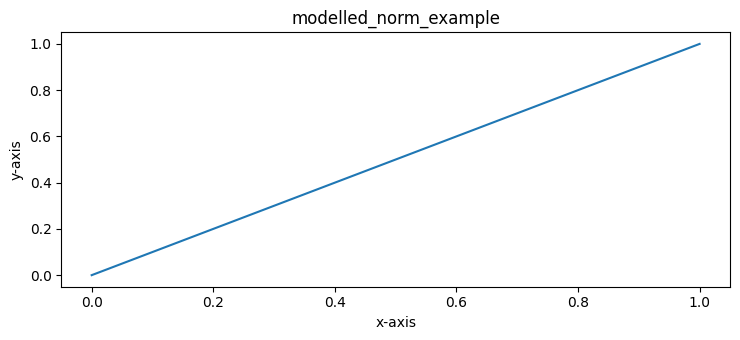

In [1556]:
# in this code block we just try out the model function again

# this time with the normalized data

print(f"x_known_norm=\n{x_known_norm}")
print(f"y_known_norm=\n{y_known_norm}")

# these are our more carefully chosen examples for w and b
# as plain python floats
w_norm_example = 1.
b_norm_example = .0

# as numpy objects
w_norm_example_np = np.asarray([w_norm_example], dtype='float32')
b_norm_example_np = np.asarray([b_norm_example], dtype='float32')

# try out the numpy version with our known x values
y_modelled_norm_example_2 = f(w_norm_example, x_known_norm, b_norm_example)
assert y_modelled_norm_example_2.shape == y_known_norm.shape
assert y_modelled_norm_example_2.dtype == 'float32'
assert np.isscalar(y_modelled_norm_example_2) == False
print(f"y_modelled_example_2=\n{np.round(y_modelled_norm_example_2, 3)}")

# check if it also works if we provide the one weight and the bias as numpy arrays
assert x_known_norm.dtype == 'float32'

y_modelled_norm_example = f(w_norm_example_np, x_known_norm, b_norm_example_np)
assert y_modelled_norm_example.shape == y_known_norm.shape
assert y_modelled_norm_example.dtype == 'float32'
assert np.isscalar(y_modelled_norm_example) == False
print(f"y_modelled_example=\n{np.round(y_modelled_norm_example, 3)}")

# plain line plot of the modelled example
plt.figure(dpi=100)
plt.plot(x_known_norm,y_modelled_norm_example)
plt.title('modelled_norm_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

#### Error Functions

In [1557]:
# in this code block we define the error function

# first look at mean squared error

# y are the actual known values
# x are the corresponding x values
# f is the model function
# w is the weight used in the model function
# b is the bias used in the model function

# sse formula is sum((y-f(x))^2)

def sse(y, x, f, w, b):
    # what does the model say?
    y_m = f(w,x,b)
    # what is the difference to the actual result
    y_diff = y - y_m
    # squared
    squares = np.square(y_diff)
    # summed up
    sum_of_squares = squares.sum()
    return sum_of_squares

# mse formula is sum((y-f(x))^2) / n

def mse(y, x, f, w, b):
    sum_of_squares = sse(y,x,f,w,b)
    # divided by the number of data points
    n = len(x)
    mse_value = sum_of_squares / n
    return mse_value

# rmse formula is sqrt(sum((y-f(x))^2) / n)

def rmse(y, x, f, w, b):
    mse_value = mse(y,x,f,w,b)
    # square root thereof
    rmse_value = np.sqrt(mse_value)
    return rmse_value

# mae formula is sum(|y-f(x)|) / n

def mae(y, x, f, w, b):
    # what does the model say?
    y_m = f(w,x,b)
    # what is the difference to the actual result
    y_diff = y - y_m
    # the absolute of that
    y_diff_abs = np.abs(y_diff)
    # summed up
    y_diff_abs_sum = y_diff_abs.sum()    
    # divided by the number of data points
    n = len(x)
    mae_value = y_diff_abs_sum / n
    return mae_value

# design aspect
# note that instead of passing the model function f to an error function
# we could instead evaluate the model function first and pass its results to each error function


In [1558]:
# in this code block we try out the error functions

# with some arbitrary values
# with the non-normalized original data

# check if it works if we provide w and b as pure python floats
sse_example_1 = sse(y_known, x_known, f, w_example, b_example)
assert np.isscalar(sse_example_1)
print(f"sse_example_1=\n{sse_example_1}")

mse_example_1 = mse(y_known, x_known, f,w_example, b_example)
assert np.isscalar(mse_example_1)
print(f"mse_example_1=\n{mse_example_1}")

rmse_example_1 = rmse(y_known, x_known, f, w_example, b_example)
assert np.isscalar(rmse_example_1)
print(f"rmse_example_1=\n{rmse_example_1}")

mae_example_1 = mae(y_known, x_known, f, w_example, b_example)
assert np.isscalar(mae_example_1)
print(f"mae_example_1=\n{mae_example_1}")

# check if it also works if we provide w and b as numpy objects
sse_example = sse(y_known, x_known, f, w_example_np, b_example_np)
assert np.isscalar(sse_example)
print(f"sse_example=\n{sse_example}")

mse_example = mse(y_known, x_known, f, w_example_np, b_example_np)
assert np.isscalar(mse_example)
print(f"mse_example=\n{mse_example}")

rmse_example = rmse(y_known, x_known, f, w_example_np, b_example_np)
assert np.isscalar(rmse_example)
print(f"rmse_example=\n{rmse_example}")

mae_example = mae(y_known, x_known, f, w_example_np, b_example_np)
assert np.isscalar(mae_example)
print(f"mae_example=\n{mae_example}")

assert sse_example_1 == sse_example
assert mse_example_1 == mse_example
assert rmse_example_1 == rmse_example
assert mae_example_1 == mae_example


sse_example_1=
896.7341918945312
mse_example_1=
64.0524422781808
rmse_example_1=
8.003276971227523
mae_example_1=
5.061713082449777
sse_example=
896.7341918945312
mse_example=
64.0524422781808
rmse_example=
8.003276971227523
mae_example=
5.061713082449777


In [1559]:
# in this code block we try out the error functions again

# this time with the normalized data

# check if it works if we provide w and b as pure python floats
sse_example_1 = sse(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(sse_example_1)
print(f"sse_example_1=\n{sse_example_1}")

mse_example_1 = mse(y_known_norm, x_known_norm, f,w_norm_example, b_norm_example)
assert np.isscalar(mse_example_1)
print(f"mse_example_1=\n{mse_example_1}")

rmse_example_1 = rmse(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(rmse_example_1)
print(f"rmse_example_1=\n{rmse_example_1}")

mae_example_1 = mae(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(mae_example_1)
print(f"mae_example_1=\n{mae_example_1}")

# check if it also works if we provide w and b as numpy objects
sse_example = sse(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(sse_example)
print(f"sse_example=\n{sse_example}")

mse_example = mse(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(mse_example)
print(f"mse_example=\n{mse_example}")

rmse_example = rmse(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(rmse_example)
print(f"rmse_example=\n{rmse_example}")

mae_example = mae(y_known_norm, x_known_norm, f, w_norm_example, b_norm_example)
assert np.isscalar(mae_example)
print(f"mae_example=\n{mae_example}")

assert sse_example_1 == sse_example
assert mse_example_1 == mse_example
assert rmse_example_1 == rmse_example
assert mae_example_1 == mae_example

sse_example_1=
0.15910892188549042
mse_example_1=
0.011364922991820745
rmse_example_1=
0.10660639282810738
mae_example_1=
0.06571151529039655
sse_example=
0.15910892188549042
mse_example=
0.011364922991820745
rmse_example=
0.10660639282810738
mae_example=
0.06571151529039655


#### Initialize Weights randomly

In [1560]:
# in this code block our weight values are initialized in a very explicit verbose fashion

# this is the number of weights in our model function
# so it is also going to be the number of values in our vector of weights w
number_of_weights = 2

# in the following the variables prefixed with w_pre_ are just intermediate variables
# the variable w_init is the vector of our weights after initialization

# in this example we draw random values based on a normal distribution
# we actually draw two more values than number_of_weights
# since during the following min-max-normalization
# the smallest value, the min, always becomes .0 (or at least very close to it owed to floats)
# and the largest value, the max, always becomes 1. (or at least very close to it owed to floats)
w_pre_number_of_values = number_of_weights + 2
w_pre_random_values_float64 = np.random.normal(loc=.5, scale=.2, size=w_pre_number_of_values)
# note that the random function yields float64 however we want float32 all the way
w_pre_random_values = w_pre_random_values_float64.astype('float32')
assert w_pre_random_values.shape == (w_pre_number_of_values,)
assert w_pre_random_values.dtype == 'float32'
print(f"w_pre={w_pre_random_values}")

# the values in w_pre_initialized can be below 0 and above 1 so we min-max-normalize them
# in this case just out of curiosity through explicit code based on numpy primitives
# instead of using functionality from some library such as the MinMaxScaler from scikit-learn
# formula for min-max-normalization is value_min_max_norm = value - min / max - min

# the min of the drawn random values and note that scalars have shape ()
w_pre_min = w_pre_random_values.min()
assert w_pre_min.shape == ()
assert w_pre_min.dtype == 'float32'
print(f"w_pre_min={w_pre_min}")

# the max of the drawn random values
w_pre_max = w_pre_random_values.max()
assert w_pre_max.shape == ()
assert w_pre_max.dtype == 'float32'
print(f"w_pre_max={w_pre_max}")

# the range
w_pre_range = w_pre_max - w_pre_min
assert w_pre_range.shape == ()
assert w_pre_range.dtype == 'float32'
print(f"w_pre_range={w_pre_range}")

# 1 over the range and note how the division yields float64 however we want float32 all the way
w_pre_range_reciprocal = (1 / w_pre_range).astype('float32')
assert w_pre_range_reciprocal.shape == ()
assert w_pre_range_reciprocal.dtype == 'float32'
print(f"w_pre_range_reciprocal={w_pre_range_reciprocal}")

# an array of the same shape as w_pre_random_values and where all values equal w_pre_min
w_pre_min_repeated = np.full_like(w_pre_random_values, w_pre_min)
assert w_pre_min_repeated.shape == (w_pre_number_of_values,)
assert w_pre_min_repeated.dtype == 'float32'
print(f"w_pre_min_repeated={w_pre_min_repeated}")

# an array with all the random values after subtracting w_pre_min from them
w_pre_minus_min = np.subtract(w_pre_random_values, w_pre_min_repeated)
assert w_pre_minus_min.shape == (w_pre_number_of_values,)
assert w_pre_minus_min.dtype == 'float32'
print(f"w_pre_minus_min={w_pre_minus_min}")

# the array with the min-max-normalized random values
w_pre_min_max_norm = w_pre_minus_min * w_pre_range_reciprocal
assert w_pre_min_max_norm.shape == (w_pre_number_of_values,)
assert w_pre_min_max_norm.dtype == 'float32'
print(f"w_pre_min_max_norm={w_pre_min_max_norm}")

# we now mask the values that are equal or close to the minimum .0 or the maximum .1
w_pre_masked = np.ma.masked_outside(w_pre_min_max_norm, .001, .999, copy=True)
assert w_pre_masked.shape == (w_pre_number_of_values,)
assert w_pre_masked.dtype == 'float32'
print(f"w_pre_masked={w_pre_masked}")

# to finally drop them using the function compressed() of the masking facility to obtain our weights
w_init_float = w_pre_masked.compressed()
print(f"\nw_init={w_init_float}")
assert w_init_float.shape == (number_of_weights,)
assert w_init_float.dtype == 'float32'


w_pre=[0.40510184 0.3810016  0.49636722 0.6167033 ]
w_pre_min=0.3810015916824341
w_pre_max=0.6167032718658447
w_pre_range=0.23570168018341064
w_pre_range_reciprocal=4.242650985717773
w_pre_min_repeated=[0.3810016 0.3810016 0.3810016 0.3810016]
w_pre_minus_min=[0.02410024 0.         0.11536562 0.23570168]
w_pre_min_max_norm=[0.10224892 0.         0.4894561  0.99999994]
w_pre_masked=[0.10224892199039459 -- 0.48945608735084534 --]

w_init=[0.10224892 0.4894561 ]
